# Prise en main des concepts du Deep Learning

<br/>

##### Arnaud Deleruyelle : Doctorant SIGMA - BioComputing
##### Encadrement: John Klein (SIGMA) - Cristian Versari (BioComputing)

## Partie 1 : Initialisation du code

Nous allons traiter ce travail à l'aide de la bibliothèque Tensorflow de Google. 
Cette partie va se consacrer à la gestion des imports, la création des données etc...

### Section 1.1: Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import sin
from IPython.core.display import Image, display

### Section 1.2: Création d'un dataset artificiel

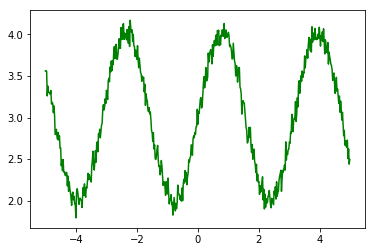

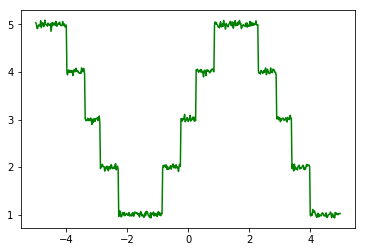

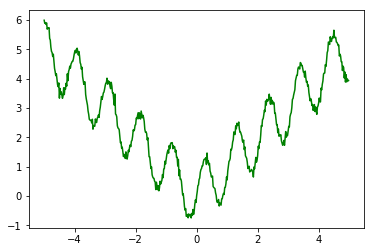

In [2]:
# dataset

def f_sin(x): return sin(2*x) + 3

def f_round(x): return round(2*sin(x) + 3)

def f_absin(x): return sin(6*x) + abs(x)


x = np.arange(-5, 5, 0.02).reshape(-1,1)
y_f1 = np.array([f_sin(x) + np.random.normal(0, 0.08) for x in x]).reshape(-1,1)
y_f2 = np.array([f_round(x) + np.random.normal(0, 0.04) for x in x]).reshape(-1,1)
y_f3 = np.array([f_absin(x) + np.random.normal(0, 0.1) for x in x]).reshape(-1,1)


plt.plot(x,y_f1, 'green')
plt.show()

plt.plot(x,y_f2, 'green')
plt.show()

plt.plot(x,y_f3, 'green')
plt.show()


### Section 1.3: Variables Globales

In [3]:
epochs = 10000
batch_size = 100

x_batch = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='x_batch')
y_batch = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='y_batch')

### Section 1.4: Fit

In [4]:
def Fit(x_train,y_train,model, verbose = 2000):
    sess = tf.Session()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    for epoch in range(epochs):
        indices = np.random.choice(x_train.shape[0], size=batch_size)
        x_b = x_train[indices]
        y_b = y_train[indices]
        feed_dict = {x_batch: x_b, y_batch: y_b}
        sess.run(model, feed_dict=feed_dict)
        if epoch%verbose ==0:
            print("Loss = ", sess.run(avg_llh, feed_dict=feed_dict))
    return sess

### Section 1.5: Predict

In [5]:
def Predict(x_test,session):
    feed_dict = {x_batch: x_test}
    yh_vals = session.run((y_pred), feed_dict=feed_dict)
    return yh_vals

    

### Section 1.6: MLP

In [6]:
def weight_variable(shape):
    initial = tf.truncated_normal([int(shape[0]),shape[1]], stddev=0.1)
    return tf.Variable(initial, dtype = tf.float32)
 
# The constant value 0.1
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, dtype = tf.float32)

def MLP(x_b,tab_neurones, tab_activation, name="MLP"):
    with tf.name_scope(name):
        outs = []
        for i in range(len(tab_neurones)):
            if i == 0 :
                input_nb_neurone = x_b.shape[1]
                input_data = x_b
            else:
                input_nb_neurone = tab_neurones[i-1]
                input_data = outs[i-1]
            W = weight_variable([input_nb_neurone, tab_neurones[i]])
            b = bias_variable([tab_neurones[i]])
            if (tab_activation[i] == "relu"):
                out = tf.nn.relu(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "sigmoid"):
                out = tf.nn.sigmoid(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "tanh"):
                out = tf.tanh(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "softmax"):
                out = tf.nn.softmax(tf.matmul(input_data, W) + b)
            else:
                out = tf.matmul(input_data, W) + b
            outs.append(out)
        return outs
        

In [36]:
def MLP(x_b,tab_neurones, tab_activation, dropout = 1, name="MLP"):
    with tf.name_scope(name):
        outs = []
        for i in range(len(tab_neurones)):
            if i == 0 :
                input_nb_neurone = x_b.shape[1]
                input_data = x_b
            else:
                input_nb_neurone = tab_neurones[i-1]
                input_data = outs[i-1]
            W = weight_variable([input_nb_neurone, tab_neurones[i]])
            b = bias_variable([tab_neurones[i]])
            if (tab_activation[i] == "relu"):
                out = tf.nn.relu(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "sigmoid"):
                out = tf.nn.sigmoid(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "tanh"):
                out = tf.tanh(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "softmax"):
                out = tf.nn.softmax(tf.matmul(input_data, W) + b)
            else:
                out = tf.matmul(input_data, W) + b
            # gestion du dropout
            if (dropout != 1) & (i != len(tab_neurones)-1):
                out_drop = tf.nn.dropout(out, dropout)
                outs.append(out_drop)
            else:
                outs.append(out)
        return outs

### Section 1.7: Test d'un modèle

In [7]:
mlp1 = MLP(x_batch,[8,8,1], ['tanh','tanh','identity'])

# output layer
y_pred = mlp1[-1]

with tf.name_scope("loss"):
    # loss function
    loglikelihoods = tf.square(y_pred - y_batch)
    avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
model = opt.minimize(avg_llh)

In [8]:
# fit the model
modelFit = Fit(x,y_f1,model)

Loss =  9.427013
Loss =  0.42474818
Loss =  0.45295632
Loss =  0.050514933
Loss =  0.00594036


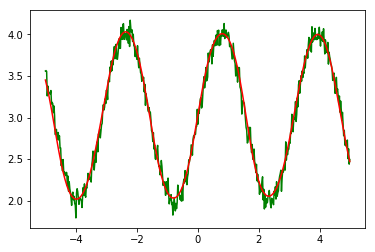

In [9]:
# predict 
modelPredict = Predict(x,modelFit)

plt.plot(x,y_f1, 'green')
plt.plot(x,modelPredict, 'red')
plt.show()

In [10]:
writer = tf.summary.FileWriter("/tmp/graph/1")
writer.add_graph(modelFit.graph)

In [11]:
Image(filename = "/home/adeleruyelle/Images/tsb1.png", width=500, height=500)
modelFit.close()

## Partie 2: Utilisation des différentes fonctions d'activation.

Dans cette partie, nous allons étudier les 4 fonctions d'activation (Relu, sigmoide, tanh, identité).
Pour ce faire, nous avons choisi un optimiseur (Adam) de manière à ne changer que la couche d'activation.

### Section 2.1: fonction de test

In [12]:
# mse

def mse(y_pred,y):
    return np.mean(np.square(y_pred - y))

npArray1 = np.array([1,2,4])
npArray2 = np.array([1,3,7])

print("mse = " + str(mse(npArray1,npArray2)))

# mae

def mae(y_pred,y):
    return np.mean(np.abs(y_pred - y))

print("mae = " + str(mae(npArray1,npArray2)))

mse = 3.3333333333333335
mae = 1.3333333333333333


In [13]:
# test with mean of n launch

def testFunctionActivation(n, x_vals, y_vals, model):
    liste_result = []
    for i in range(n):
        session = Fit(x_vals, y_vals, model, verbose = 5000)
        y_result = Predict(x_vals,session)
        liste_result.append(y_result)
        session.close()
    result = np.mean(liste_result, axis = 0)
    return result.reshape(result.shape[0],1)
        

### Section 2.2: Relu

In [14]:
# model with Relu

mlp_relu = MLP(x_batch,[8,8,8,1], ['relu','relu','relu','identity'])

# output layer
y_pred = mlp_relu[-1]

with tf.name_scope("loss"):
    # loss function
    loglikelihoods = tf.square(y_pred - y_batch)
    avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelRelu = opt.minimize(avg_llh)

(?, 1)


In [15]:
# train model
resRelu_sin = testFunctionActivation(5,x,y_f1,modelRelu)
resRelu_round = testFunctionActivation(5,x,y_f2,modelRelu)
resRelu_absin = testFunctionActivation(5,x,y_f3,modelRelu)

Loss =  8311.728301013689
Loss =  0.4052554582370575
Loss =  9713.448548124665
Loss =  0.49901773579715925
Loss =  9892.648139748315
Loss =  0.4555295148476112
Loss =  10132.30796808251
Loss =  0.4432179205949891
Loss =  6961.089489007423
Loss =  0.47511622545193816
Loss =  8361.771955611066
Loss =  0.1299800483547548
Loss =  9175.13969441469
Loss =  0.15174343778705773
Loss =  8898.561671010488
Loss =  0.17985475693606146
Loss =  11077.934791674646
Loss =  0.16880498239008998
Loss =  10943.009853500367
Loss =  0.16969377301686644
Loss =  9884.099812755514
Loss =  0.4878051916030519
Loss =  10871.53636742886
Loss =  0.5556864702319286
Loss =  9942.215512044571
Loss =  0.501384111982108
Loss =  11309.0079864536
Loss =  0.5441643169667231
Loss =  10308.632462460166
Loss =  0.5398696124267527


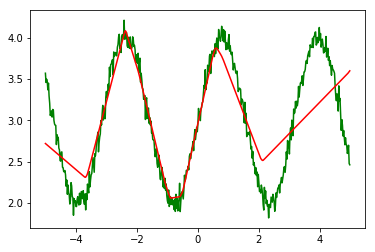

mae = 0.2667280461143014
mse = 0.12876679356630505


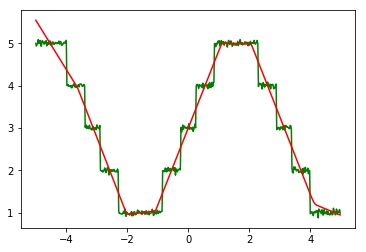

mae = 0.20132923488719887
mse = 0.0667415002750354


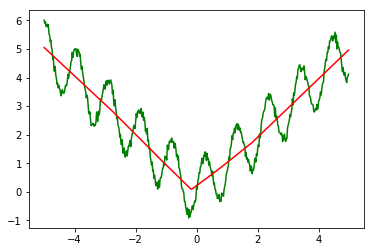

mae = 0.6436288869503415
mse = 0.5133266340712914


In [16]:
# print result

plt.plot(x,y_f1, 'green')
plt.plot(x,resRelu_sin, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_sin,y_f1)))
print( "mse = " + str(mse(resRelu_sin,y_f1)))


plt.plot(x,y_f2, 'green')
plt.plot(x,resRelu_round, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_round,y_f2)))
print( "mse = " + str(mse(resRelu_round,y_f2)))


plt.plot(x,y_f3, 'green')
plt.plot(x,resRelu_absin, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_absin,y_f3)))
print( "mse = " + str(mse(resRelu_absin,y_f3)))

### Section 2.3: Sigmoide

In [17]:
# model with sigmoid

mlp_sigmoid = MLP(x_batch,[8,8,8,1], ['sigmoid','sigmoid','sigmoid','identity'])

# output layer
y_pred = mlp_sigmoid[-1]

#loss function
with tf.name_scope("loss"):
    loglikelihoods = tf.square(y_pred - y_batch)
    avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelSigmoid = opt.minimize(avg_llh)

(?, 1)


In [18]:
# train model
resSigmoid_sin = testFunctionActivation(5,x,y_f1,modelSigmoid)
resSigmoid_round = testFunctionActivation(5,x,y_f2,modelSigmoid)
resSigmoid_absin = testFunctionActivation(5,x,y_f3,modelSigmoid)

Loss =  0.8401688325569774
Loss =  0.17446117000501155
Loss =  0.805585992744281
Loss =  0.16109700715095093
Loss =  0.7631923940905014
Loss =  0.2193184289502951
Loss =  0.7809308555334156
Loss =  0.2774114306807984
Loss =  0.8037579815684677
Loss =  0.26734510484820345
Loss =  2.783577451710374
Loss =  0.08057800132979917
Loss =  2.8153435232140236
Loss =  0.07916588130731247
Loss =  2.693520843182422
Loss =  0.07609577829218674
Loss =  2.6073369324744418
Loss =  0.07677631168186844
Loss =  2.2368465092977643
Loss =  0.06576165413371397
Loss =  3.7446507307451338
Loss =  0.4863644614218428
Loss =  4.5331893771055665
Loss =  0.5789811228785341
Loss =  4.192702285419752
Loss =  0.5316657330816658
Loss =  4.985954176730353
Loss =  0.462781478543982
Loss =  3.7846859047788204
Loss =  0.4627781598318093


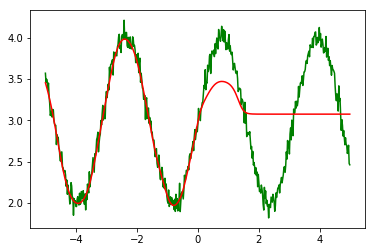

mae = 0.2926551323866234
mse = 0.18863719727463577


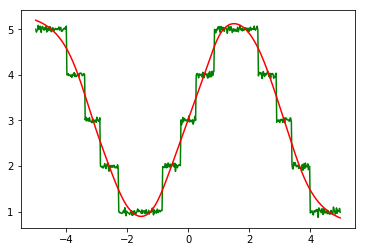

mae = 0.20792243348170422
mse = 0.06592565108002194


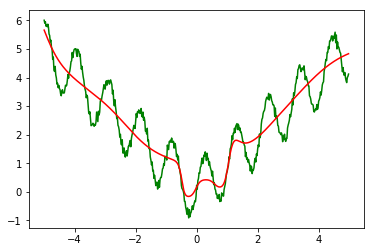

mae = 0.5711929030128062
mse = 0.434364512014358


In [19]:
# print result

plt.plot(x,y_f1, 'green')
plt.plot(x,resSigmoid_sin, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_sin,y_f1)))
print( "mse = " + str(mse(resSigmoid_sin,y_f1)))


plt.plot(x,y_f2, 'green')
plt.plot(x,resSigmoid_round, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_round,y_f2)))
print( "mse = " + str(mse(resSigmoid_round,y_f2)))


plt.plot(x,y_f3, 'green')
plt.plot(x,resSigmoid_absin, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_absin,y_f3)))
print( "mse = " + str(mse(resSigmoid_absin,y_f3)))

### Section 2.4: Tanh

In [20]:
# model with tanh

mlp_tanh = MLP(x_batch,[8,8,8,1], ['tanh','tanh','tanh','identity'])

# output layer
y_pred = mlp_tanh[-1]


# loss function
with tf.name_scope("loss"):
    loglikelihoods = tf.square(y_pred - y_batch)
    avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelTanh = opt.minimize(avg_llh)

(?, 1)


In [21]:
# train model
resTanh_sin = testFunctionActivation(5,x,y_f1,modelTanh)
resTanh_round = testFunctionActivation(5,x,y_f2,modelTanh)
resTanh_absin = testFunctionActivation(5,x,y_f3,modelTanh)

Loss =  14.753040636815136
Loss =  0.19639276464006541
Loss =  15.175153201940248
Loss =  0.21106711396500594
Loss =  12.009884023498484
Loss =  0.04002526521897896
Loss =  13.174493732516675
Loss =  0.18238994688759738
Loss =  12.380928772703996
Loss =  0.2534892908203659
Loss =  13.411099426905855
Loss =  0.0539167510507318
Loss =  16.985416401992087
Loss =  0.04453982651695473
Loss =  14.825741524102863
Loss =  0.05558291710497029
Loss =  12.554928184222959
Loss =  0.05643759421210335
Loss =  14.955784520664972
Loss =  0.04755963667329823
Loss =  15.857634163575675
Loss =  0.08071529078246709
Loss =  18.53235088253465
Loss =  0.22474912736286076
Loss =  12.134863912186113
Loss =  0.2083836517285243
Loss =  16.890373879498306
Loss =  0.1727682108013284
Loss =  13.425324810542566
Loss =  0.2387291161623552


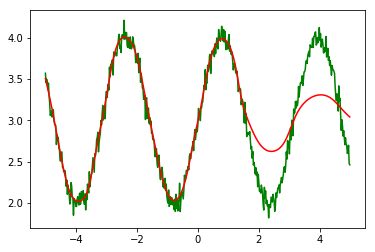

mae = 0.18047721265431732
mse = 0.07464245578951055


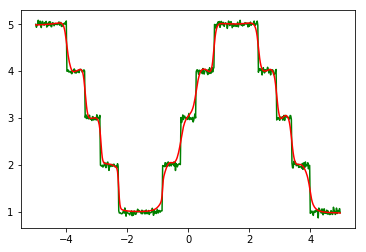

mae = 0.09198837032332267
mse = 0.022059857885564166


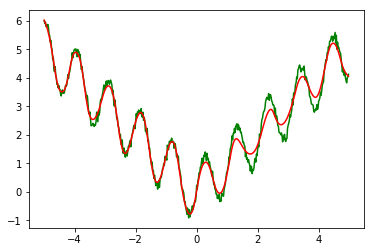

mae = 0.17710881078209315
mse = 0.05409214789703239


In [22]:
# print result

plt.plot(x,y_f1, 'green')
plt.plot(x,resTanh_sin, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_sin,y_f1)))
print( "mse = " + str(mse(resTanh_sin,y_f1)))


plt.plot(x,y_f2, 'green')
plt.plot(x,resTanh_round, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_round,y_f2)))
print( "mse = " + str(mse(resTanh_round,y_f2)))


plt.plot(x,y_f3, 'green')
plt.plot(x,resTanh_absin, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_absin,y_f3)))
print( "mse = " + str(mse(resTanh_absin,y_f3)))

### Section 2.4: Identité

In [23]:
# model without activation

mlp_id = MLP(x_batch,[8,8,8,1], ['identity','identity','identity','identity'])

# output layer
y_pred = mlp_id[-1]


# loss function
with tf.name_scope("loss"):
    loglikelihoods = tf.square(y_pred - y_batch)
    avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelId = opt.minimize(avg_llh)

(?, 1)


In [24]:
# train model
resId_sin = testFunctionActivation(5,x,y_f1,modelId)
resId_round = testFunctionActivation(5,x,y_f2,modelId)
resId_absin = testFunctionActivation(5,x,y_f3,modelId)

Loss =  10995.562409726339
Loss =  0.4817834629324278
Loss =  7434.800844082517
Loss =  0.5009075982290089
Loss =  10729.264030338662
Loss =  0.4319836802297769
Loss =  8760.060648894367
Loss =  0.517236684827912
Loss =  7274.856723918775
Loss =  0.5025194470617061
Loss =  9484.887519047736
Loss =  2.5777627072703235
Loss =  9955.130950472994
Loss =  1.8368422662837742
Loss =  9683.07646530631
Loss =  2.1488718398317745
Loss =  10981.578548705507
Loss =  2.2890492420500648
Loss =  10011.766935183148
Loss =  2.2196981046414446
Loss =  10064.732573037403
Loss =  2.583372854560173
Loss =  9091.6944298877
Loss =  3.277041365554966
Loss =  9375.770452022096
Loss =  2.319276074816279
Loss =  10497.352943770504
Loss =  2.7942951555743036
Loss =  10389.048844045545
Loss =  2.844502597387592


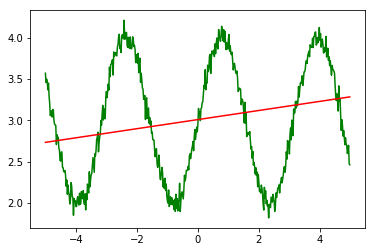

mae = 0.6010602894863878
mse = 0.4670065452453566


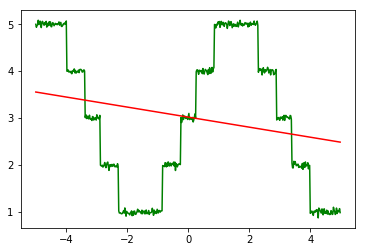

mae = 1.3217971606360621
mse = 2.214774272133602


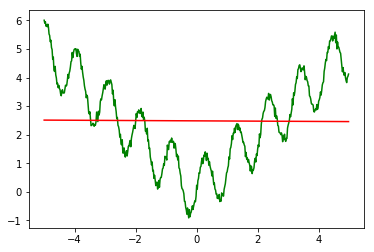

mae = 1.3547886864603367
mse = 2.61721614271902


In [25]:
# print result

plt.plot(x,y_f1, 'green')
plt.plot(x,resId_sin, 'red')
plt.show()

print( "mae = " + str(mae(resId_sin,y_f1)))
print( "mse = " + str(mse(resId_sin,y_f1)))


plt.plot(x,y_f2, 'green')
plt.plot(x,resId_round, 'red')
plt.show()

print( "mae = " + str(mae(resId_round,y_f2)))
print( "mse = " + str(mse(resId_round,y_f2)))


plt.plot(x,y_f3, 'green')
plt.plot(x,resId_absin, 'red')
plt.show()

print( "mae = " + str(mae(resId_absin,y_f3)))
print( "mse = " + str(mse(resId_absin,y_f3)))

## Part 3: Généralisation

Dans cette partie, nous allons ajouter des indicateurs concernant la généralisation de nos algorithmes.

### Section 3.1: train/test

In [15]:
def train_test(x,y,ratio):
    union = np.hstack((x,y))
    np.random.shuffle(union)
    split = np.hsplit(union,2)
    ratio_separate = int(ratio * len(x))
    return (split[0][:ratio_separate],split[0][ratio_separate:],split[1][:ratio_separate],split[1][ratio_separate:])
    
    

In [16]:
x_train_f1,x_test_f1,y_train_f1,y_test_f1 = train_test(x,y_f1,0.8)
x_train_f2,x_test_f2,y_train_f2,y_test_f2 = train_test(x,y_f2,0.8)
x_train_f3,x_test_f3,y_train_f3,y_test_f3 = train_test(x,y_f3,0.8)

### Section 3.2: Fit with train/test

In [20]:
def Fit(x_train,x_test,y_train,y_test,model, verbose = 500):
    sess = tf.InteractiveSession()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    visualisation = []
    for epoch in range(epochs):
        indices = np.random.choice(x_train.shape[0], size=batch_size)
        x_b = x_train[indices]
        y_b = y_train[indices]
        feed_dict = {x_batch: x_b, y_batch: y_b}
        sess.run(model, feed_dict=feed_dict)
        if epoch%verbose ==0:
            feed_dict_train = {x_batch: x_train, y_batch: y_train}
            feed_dict_test = {x_batch: x_test, y_batch: y_test}
            loss_train = sess.run(avg_llh, feed_dict=feed_dict_train)
            loss_test = sess.run(avg_llh, feed_dict=feed_dict_test)
            print("Epoch: ", epoch)
            print("Loss train = ", loss_train)
            print("Loss test = ", loss_test)
            visualisation.append(np.array([epoch,loss_train,loss_test]))
    return (sess,np.array(visualisation))

In [13]:
mlp1 = MLP(x_batch,[8,8,1], ['relu','relu','identity'])

# output layer
y_pred = mlp1[-1]

# loss function
with tf.name_scope("loss"):
    loglikelihoods = tf.square(y_pred - y_batch)
    avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
model = opt.minimize(avg_llh)

In [88]:
# fit the model
modelFit,visu = Fit(x_train_f1,x_test_f1,y_train_f1,y_test_f1,model)

ValueError: Cannot feed value of shape (1000, 1) for Tensor 'x_batch_4:0', which has shape '(?, 784)'

In [26]:
def print_visu(visu):
    error = np.hsplit(visu,3)
    plt.plot(error[0],error[1], 'green', label='train')
    plt.plot(error[0],error[2], 'red',label='test')
    plt.legend()
    plt.show()

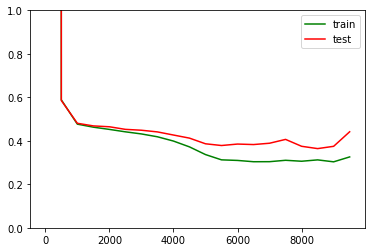

In [32]:
plt.axis(ymax=1,y_min = 0)
print_visu(visu)

La courbe de test est plus basse .....

Il faut tester sur des données plus complexes. Nous allons voir avec les données MNIST

## Part 4: MNIST

### Section 4.1: Récupération des données

In [12]:
mnist = tf.keras.datasets.mnist

In [13]:
# download data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [14]:
def mnist_label(i):
    label = np.zeros(10)
    label[i] = 1
    return label

In [15]:
y_train_mnist = np.array([mnist_label(y_train[i]) for i in range(len(y_train))])
y_test_mnist = np.array([mnist_label(y_test[i]) for i in range(len(y_test))])

In [16]:
#reformat data
x_train = x_train.reshape(60000,784).astype(float)
y_train = y_train_mnist.reshape(60000,10).astype(float)
x_test = x_test.reshape(10000,784).astype(float)
y_test = y_test_mnist.reshape(10000,10).astype(float)

### Section 4.2: Création d'un MLP pour la classif

In [17]:
epochs = 20000
batch_size = 500

x_batch = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='x_batch')
y_batch = tf.placeholder(shape=[None, 10], dtype=tf.float32, name='y_batch')

In [18]:
mlp_mnist = MLP(x_batch,[25,10], ['sigmoid','identity'])

# output layer
y_pred = mlp_mnist[-1]

# loss function
loglikelihoods = tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_pred, labels = y_batch)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
#opt = tf.train.AdamOptimizer(learning_rate=0.001)
opt = tf.train.GradientDescentOptimizer(0.5)

model_mnist = opt.minimize(avg_llh)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
# fit the model
modelFit_mnist,visu = Fit(x_train,x_test,y_train,y_test,model_mnist)

Epoch:  0
Loss train =  2.2597237
Loss test =  2.253294
Epoch:  500
Loss train =  0.57772267
Loss test =  0.5712584
Epoch:  1000
Loss train =  0.51106894
Loss test =  0.49211437
Epoch:  1500
Loss train =  0.4695548
Loss test =  0.45881006
Epoch:  2000
Loss train =  0.42128435
Loss test =  0.4063684
Epoch:  2500
Loss train =  0.47363445
Loss test =  0.46137315
Epoch:  3000
Loss train =  0.39180598
Loss test =  0.3833229
Epoch:  3500
Loss train =  0.40106237
Loss test =  0.40059555
Epoch:  4000
Loss train =  0.39604148
Loss test =  0.37986574
Epoch:  4500
Loss train =  0.37785605
Loss test =  0.37240526
Epoch:  5000
Loss train =  0.3607568
Loss test =  0.35387385
Epoch:  5500
Loss train =  0.38715422
Loss test =  0.3705953
Epoch:  6000
Loss train =  0.37796068
Loss test =  0.3767214
Epoch:  6500
Loss train =  0.36750138
Loss test =  0.3651635
Epoch:  7000
Loss train =  0.3517968
Loss test =  0.3468032
Epoch:  7500
Loss train =  0.37269273
Loss test =  0.37628165
Epoch:  8000
Loss train =

In [22]:
writer = tf.summary.FileWriter("/tmp/graph/2")
writer.add_graph(modelFit_mnist.graph)

In [23]:
result_mnist = Predict(x_test,modelFit_mnist)

In [24]:
correct_prediction = np.equal(np.argmax(result_mnist, 1), np.argmax(y_test, 1))
accuracy = np.mean(correct_prediction.astype(float))

print(accuracy)

0.9124


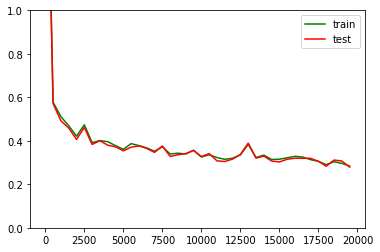

In [29]:
plt.axis(ymax=1,y_min = 0)
print_visu(visu)

### Section 5: Early Stopping

In [30]:
def ES(x_train,x_test,y_train,y_test,model,n = 500, p = 15, verbose = 500):
    sess = tf.Session()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    saver = tf.train.Saver()
    visualisation = []
    j = 0
    step = 0
    best_loss = np.inf
    while j < p:
        # train n steps
        for i in range(n):
            indices = np.random.choice(x_train.shape[0], size=batch_size)
            x_b = x_train[indices]
            y_b = y_train[indices]
            feed_dict = {x_batch: x_b, y_batch: y_b}
            sess.run(model, feed_dict=feed_dict)
            step = step+1
        # compute en print actual score
        feed_dict_train = {x_batch: x_train, y_batch: y_train}
        feed_dict_test = {x_batch: x_test, y_batch: y_test}
        loss_train = sess.run(avg_llh, feed_dict=feed_dict_train)
        loss_test = sess.run(avg_llh, feed_dict=feed_dict_test)
        print("Loss train = ", loss_train)
        print("Loss test = ", loss_test)
        visualisation.append(np.array([step,loss_train,loss_test]))
        #compare loss
        if loss_test < best_loss:
            save_path = saver.save(sess, "/tmp/best_model.ckpt")
            j = 0
            best_loss = loss_test
        else:
            j = j+1
    best_model = saver.restore(sess, "/tmp/best_model.ckpt")
    return (sess,np.array(visualisation))

In [42]:
mlp_mnist = MLP(x_batch,[128,128,10], ['sigmoid','sigmoid','identity'])

# output layer
y_pred = mlp_mnist[-1]

# loss function
loglikelihoods = tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_pred, labels = y_batch)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001)
model_mnist = opt.minimize(avg_llh)

In [43]:
# fit the model
ES_fit_mnist,visu = ES(x_train,x_test,y_train,y_test,model_mnist)

Loss train =  0.26840198
Loss test =  0.26560906
Loss train =  0.20174365
Loss test =  0.20908733
Loss train =  0.17281795
Loss test =  0.18283865
Loss train =  0.15200943
Loss test =  0.16789302
Loss train =  0.14127262
Loss test =  0.15464394
Loss train =  0.13433798
Loss test =  0.15600465
Loss train =  0.12239186
Loss test =  0.1456044
Loss train =  0.12269134
Loss test =  0.14459586
Loss train =  0.11351762
Loss test =  0.14095053
Loss train =  0.102999434
Loss test =  0.12995061
Loss train =  0.09750729
Loss test =  0.12717435
Loss train =  0.101391904
Loss test =  0.13022913
Loss train =  0.095910385
Loss test =  0.12773818
Loss train =  0.09376189
Loss test =  0.123620555
Loss train =  0.09183634
Loss test =  0.12435123
Loss train =  0.09103299
Loss test =  0.12761655
Loss train =  0.083406836
Loss test =  0.12148235
Loss train =  0.08066051
Loss test =  0.11871296
Loss train =  0.0763765
Loss test =  0.11398738
Loss train =  0.07595557
Loss test =  0.12081797
Loss train =  0.0

In [49]:
result_mnist = Predict(x_test,ES_fit_mnist)

In [45]:
correct_prediction = np.equal(np.argmax(result_mnist, 1), np.argmax(y_test, 1))
accuracy = np.mean(correct_prediction.astype(float))

print(accuracy)

0.9702


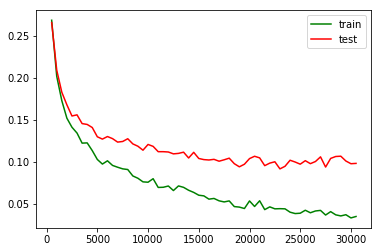

In [46]:
# visualize error
error = np.hsplit(visu,3)
plt.plot(error[0],error[1], 'green', label='train')
plt.plot(error[0],error[2], 'red',label='test')
#plt.axis(ymax=1,ymin = 0)
plt.legend()
plt.show()

In [60]:
mlp_mnist = MLP(x_batch,[128,128,10], ['sigmoid','sigmoid','identity'], dropout = 0.85)

# output layer
y_pred = mlp_mnist[-1]

# loss function
loglikelihoods = tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_pred, labels = y_batch)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001)
model_mnist = opt.minimize(avg_llh)

In [61]:
# fit the model
ES_fit_mnist,visu = ES(x_train,x_test,y_train,y_test,model_mnist)

Loss train =  0.33389127
Loss test =  0.3279324
Loss train =  0.26311582
Loss test =  0.26684064
Loss train =  0.2245319
Loss test =  0.23243174
Loss train =  0.20977491
Loss test =  0.22307563
Loss train =  0.18886493
Loss test =  0.20187673
Loss train =  0.18471637
Loss test =  0.19655707
Loss train =  0.17260852
Loss test =  0.18706192
Loss train =  0.16169888
Loss test =  0.17498331
Loss train =  0.15816607
Loss test =  0.17917286
Loss train =  0.15055762
Loss test =  0.17053537
Loss train =  0.14544256
Loss test =  0.16218552
Loss train =  0.1427815
Loss test =  0.16394173
Loss train =  0.13787659
Loss test =  0.15477425
Loss train =  0.12814961
Loss test =  0.1515626
Loss train =  0.13292572
Loss test =  0.15303557
Loss train =  0.12747793
Loss test =  0.14959082
Loss train =  0.12566009
Loss test =  0.15048705
Loss train =  0.124082685
Loss test =  0.15373342
Loss train =  0.11882968
Loss test =  0.14535572
Loss train =  0.12055698
Loss test =  0.145481
Loss train =  0.11586834


In [63]:
result_mnist = Predict(x_test,ES_fit_mnist)

correct_prediction = np.equal(np.argmax(result_mnist, 1), np.argmax(y_test, 1))
accuracy = np.mean(correct_prediction.astype(float))

print(accuracy)

0.9603


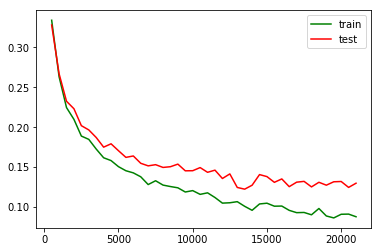

In [64]:
# visualize error
error = np.hsplit(visu,3)
plt.plot(error[0],error[1], 'green', label='train')
plt.plot(error[0],error[2], 'red',label='test')
#plt.axis(ymax=1,ymin = 0)
plt.legend()
plt.show()

## Part 6: Fit en live

In [185]:
%matplotlib notebook

def update_line(ax,fig,x_train,y_train,x_test, y_pred):
    plt.pause(0.05)
    ax.clear()
    m = max(y_train)
    mm = min(y_train)
    
    plt.axis(ymax=m*1.1,y_min = mm - 1)
    ax.plot(x_train, y_train, color = 'blue')
    ax.plot(x_test, y_pred, color = 'red')
    fig.canvas.draw()


def ES_dynamic_print(x_train,x_test,y_train,y_test,model,n = 250, p = 20, verbose = 500):
    plt.ion()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.show()
    fig.canvas.draw()
    plt.plot(x_train, y_train)
    sess = tf.Session()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    saver = tf.train.Saver()
    visualisation = []
    j = 0
    step = 0
    best_loss = np.inf
    while j < p:
        # train n steps
        for i in range(n):
            indices = np.random.choice(x_train.shape[0], size=batch_size)
            x_b = x_train[indices]
            y_b = y_train[indices]
            feed_dict = {x_batch: x_b, y_batch: y_b}
            sess.run(model, feed_dict=feed_dict)
            step = step+1
        # compute en print actual score
        feed_dict_train = {x_batch: x_train, y_batch: y_train}
        feed_dict_test = {x_batch: x_test, y_batch: y_test}
        loss_train = sess.run(avg_llh, feed_dict=feed_dict_train)
        loss_test = sess.run(avg_llh, feed_dict=feed_dict_test)
        pred = sess.run(y_pred, feed_dict=feed_dict_test)
        # affichage plot
        update_line(ax,fig,x_train,y_train,x_test,pred)
        visualisation.append(np.array([step,loss_train,loss_test]))
        #compare loss
        if loss_test < best_loss:
            save_path = saver.save(sess, "/tmp/best_model.ckpt")
            j = 0
            best_loss = loss_test
        else:
            j = j+1
    best_model = saver.restore(sess, "/tmp/best_model.ckpt")
    return (sess,np.array(visualisation))

In [186]:
mlp1 = MLP(x_batch,[32,32,1], ['sigmoid','sigmoid','identity'])

# output layer
y_pred = mlp1[-1]

with tf.name_scope("loss"):
    # loss function
    loglikelihoods = tf.square(y_pred - y_batch)
    avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001)
model = opt.minimize(avg_llh)

<IPython.core.display.Javascript object>


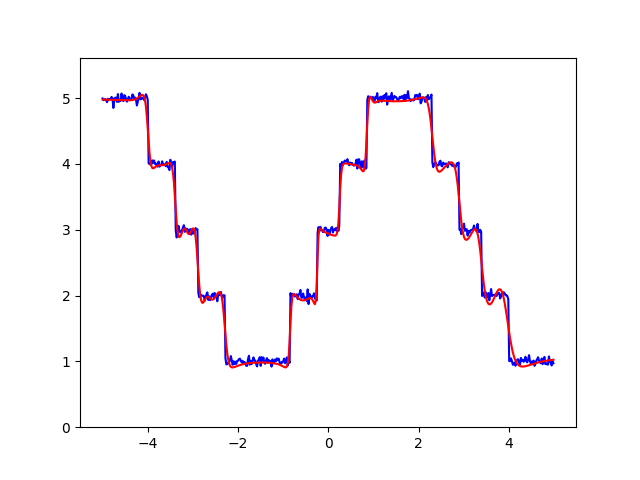

INFO:tensorflow:Restoring parameters from /tmp/best_model.ckpt


In [187]:
ESfit = ES_dynamic_print(x,x,y_f2,y_f2,model)

In [27]:
def image_array(images):
    "Matplotlib function to display a group of images inline as a block"
    num_cols = 5
    num_rows = len(images) / num_cols + 1
    plt.figure(figsize=[num_cols * 1.5, num_rows * 1.5])
    plt.gray()
    for i, data in enumerate(images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.axis('off')
        plt.imshow(images[i])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


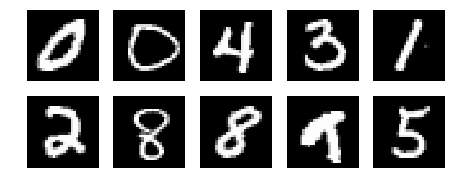

In [92]:
# Display some samples from the training set
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

image_array(mnist.train.next_batch(10)[0].reshape(10, 28, 28))

In [175]:
sess = tf.InteractiveSession()

# What kind of training optimizer we use
# optimizer = tf.train.AdamOptimizer(1e-2)
optimizer = tf.train.GradientDescentOptimizer(0.5)

# Placeholders for the input data; images and labels
x = tf.placeholder(tf.float32, shape=[None, 28*28])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

y_conv = MLP(x,[25,10],["sigmoid","identity"])[-1]

# Cost function for the network
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv))

# Optimization setup for training
train_step = optimizer.minimize(cross_entropy)



# Accuracy measure: do the y_conv predictions match the y_ inputs?
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



sess.run(tf.global_variables_initializer())

for i in range(20001):
    # Grab a bit of training data. Note this batching function is quite slow.
    batch = mnist.train.next_batch(50)
    
    # Report training progress every 1000 steps
    if i % 1000 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.9})
        test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
        print('step %d, training accuracy %g, test accuracy %g' % (i, train_accuracy, test_accuracy))
        
    # Run the training step
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1 - drop_probability})

# Report on final accuracy
test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

sess.close()





step 0, training accuracy 0.04, test accuracy 0.1009
step 1000, training accuracy 0.96, test accuracy 0.9263
step 2000, training accuracy 0.98, test accuracy 0.9416
step 3000, training accuracy 0.98, test accuracy 0.9497
step 4000, training accuracy 0.9, test accuracy 0.9519
step 5000, training accuracy 0.96, test accuracy 0.9557
step 6000, training accuracy 0.96, test accuracy 0.956
step 7000, training accuracy 0.96, test accuracy 0.958
step 8000, training accuracy 0.96, test accuracy 0.9579
step 9000, training accuracy 0.94, test accuracy 0.9609
step 10000, training accuracy 0.96, test accuracy 0.9606
step 11000, training accuracy 0.92, test accuracy 0.9605
step 12000, training accuracy 1, test accuracy 0.9589
step 13000, training accuracy 0.98, test accuracy 0.9606
step 14000, training accuracy 1, test accuracy 0.9626
step 15000, training accuracy 0.94, test accuracy 0.9622
step 16000, training accuracy 0.96, test accuracy 0.96
step 17000, training accuracy 0.98, test accuracy 0.962